In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

In [2]:
TFile *file = TFile::Open("muon.root");

In [3]:
TTree *tree = (TTree*) file->Get("T");
tree->Print();


******************************************************************************
*Tree    :T         : ev1 Tree                                               *
*Entries :    10000 : Total =          365912 bytes  File  Size =     102863 *
*        :          : Tree compression factor =   3.55                       *
******************************************************************************
*Br    0 :event     : Float_t Event                                          *
*Entries :    10000 : Total  Size=      40621 bytes  File Size  =        411 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=  97.66     *
*............................................................................*
*Br    1 :tpT       : tpT/F                                                  *
*Entries :    10000 : Total  Size=      40611 bytes  File Size  =      10990 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   3.65     *
*...................................................

In [4]:
Float_t invmass;
Float_t tE;
Float_t tpT;
Float_t eta;
Float_t etam;
Float_t phi;
Float_t phim;
Float_t tp;
tree->SetBranchAddress("invmass", &invmass);
tree->SetBranchAddress("tE", &tE);
tree->SetBranchAddress("tpT", &tpT);
tree->SetBranchAddress("eta",&eta);
tree->SetBranchAddress("etam",&etam);
tree->SetBranchAddress("phi",&phi);
tree->SetBranchAddress("phim",&phim);
tree->SetBranchAddress("tp",&tp);

In [5]:
TCanvas *canvas = new TCanvas("Canvas","a first way to plot a variable",800,600);

In [6]:
TH1F *hist_pt = new TH1F("pT","pT: Transverse Momentum; pT (GeV); Events ",50,0,150);
TH1F *hist_m = new TH1F("m","m: mass; m (GeV); Events ",50,0,200);
TH1F *hist_E = new TH1F("E","E: Energy; E (GeV); Events ",50,0,600);
TH1F *hist_eta = new TH1F("eta", "eta:Pseudo rapidez; eta (rad); Events",10,-6,6);
TH1F *hist_phi = new TH1F("phi", "phi: phi ; phi (rad); Events",10,-5,5);

TH1F *hist_pt_AT = new TH1F("pT at","pT: Transverse Momentum; pT (GeV); Events ",50,0,150);
TH1F *hist_m_AT = new TH1F("m at","m: mass; m (GeV); Events ",50,0,200);
TH1F *hist_E_AT = new TH1F("E at","E: Energy; E (GeV); Events ",50,0,600);
TH1F *hist_eta_AT = new TH1F("eta at", "eta:Pseudo rapidez; eta (rad); Events",10,-6,6);
TH1F *hist_phi_AT = new TH1F("phi at", "phi: phi ; phi (rad); Events",10,-5,5);

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_pt->Fill(tpT);
    hist_m->Fill(invmass);
    hist_E->Fill(tE);
    hist_eta->Fill(eta);
    hist_eta->Fill(etam);
    hist_phi->Fill(phi);
    hist_phi->Fill(phim);
   
    if (invmass<0.2){
        hist_pt_AT->Fill(tpT);
        hist_m_AT->Fill(invmass);
        hist_E_AT->Fill(tE);
        hist_eta_AT->Fill(eta);
        hist_eta_AT->Fill(etam);
        hist_phi_AT->Fill(phi);
        hist_phi_AT->Fill(phim);
    }
}

std::cout << "Done!" << std::endl;

Done!


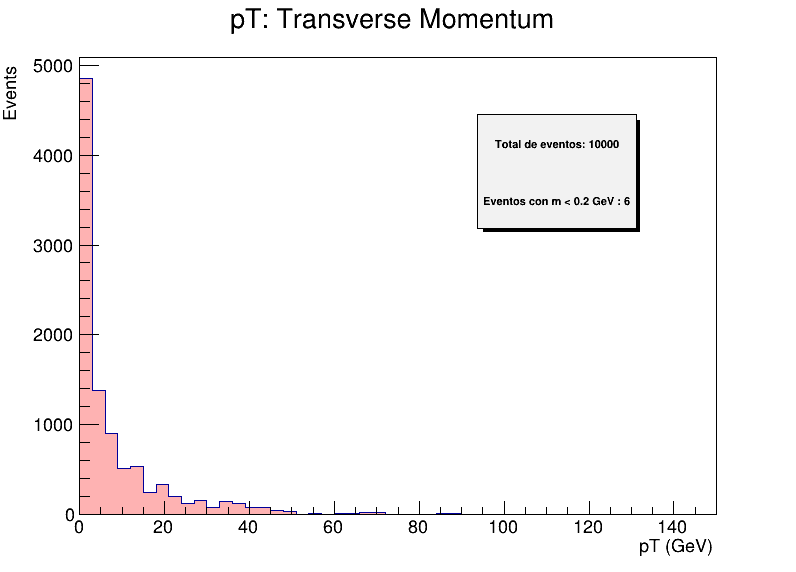

In [8]:
TPaveText *pt = new TPaveText(0.6,0.6,0.8,0.8,"brNDC");
hist_pt_AT->SetFillColorAlpha(kBlue,0.5);
hist_pt->SetFillColorAlpha(kRed,0.3);
hist_pt->SetStats(0);
hist_pt_AT->SetStats(1);
hist_pt_AT->Draw();
hist_pt->Draw();
pt->AddText("Total de eventos: 10000");
pt->AddText("Eventos con m < 0.2 GeV : 6");
pt->Draw();
canvas->Draw();

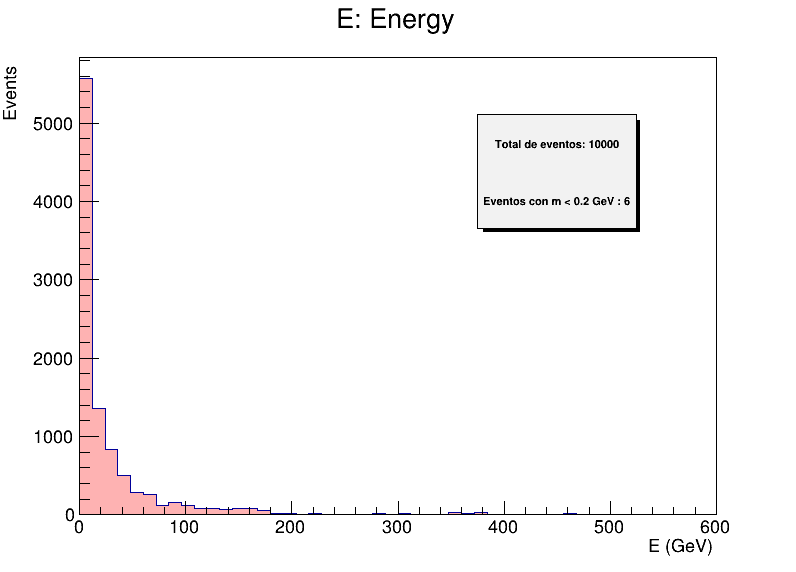

In [9]:
hist_E->SetFillColorAlpha(kRed,0.3);
hist_E_AT->SetFillColorAlpha(kBlue,0.3);
hist_E->SetStats(0);
hist_E_AT->SetStats(0);
hist_E_AT->Draw();
hist_E->Draw();
pt->Draw();
canvas->Draw();

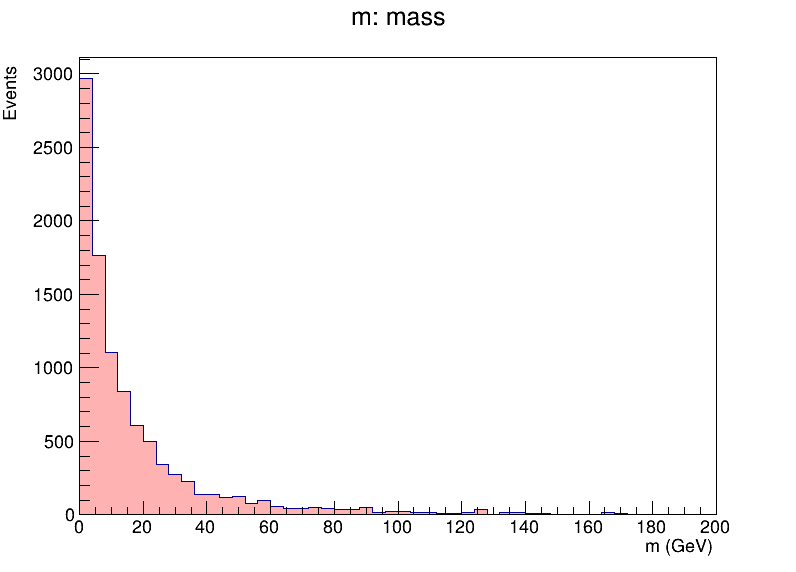

In [10]:
hist_m->SetFillColorAlpha(kRed,0.3);
hist_m_AT->SetFillColorAlpha(kBlue,0.3);
hist_m->SetStats(0);
hist_m_AT->SetStats(0);
hist_m_AT->Draw();
hist_m->Draw();
canvas->Draw();

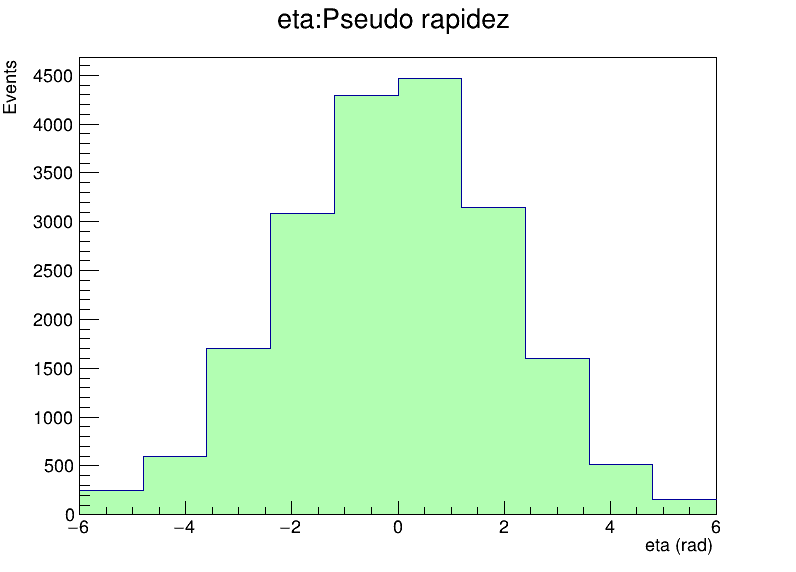

In [11]:
hist_eta->SetFillColorAlpha(kGreen,0.3);
hist_eta->SetStats(0);
hist_eta->Draw();
canvas->Draw();

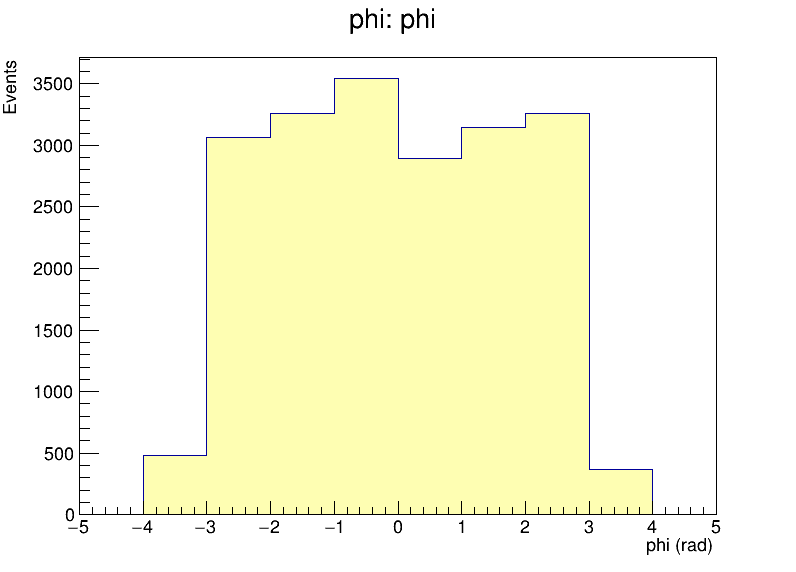

In [12]:
hist_phi->SetFillColorAlpha(kYellow,0.3);
hist_phi->SetStats(0);
hist_phi->Draw();
canvas->Draw();